In [1]:
import numpy as np
import pandas as pd

In [2]:
iris = pd.read_csv('Iris.csv')
iris.shape

(150, 6)

In [3]:
iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [7]:
X = iris.iloc[:, 1:5].values
print(X[:5])

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]


In [9]:
y = pd.Categorical(iris['Species']).codes
print(y[:5])

[0 0 0 0 0]


In [10]:
from sklearn.cluster import KMeans
estimators = {'k_means_iris_3' : KMeans(n_clusters=3),
             'k_means_iris_8' : KMeans(n_clusters=8),
             'k_menas_iris_bad_init': KMeans(n_clusters=3, n_init=1, init='random')}

In [11]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

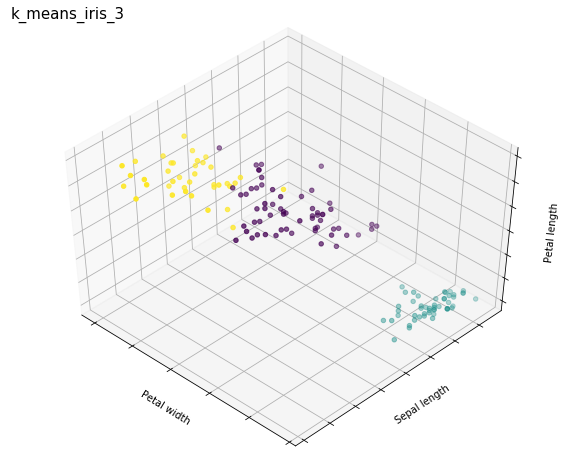

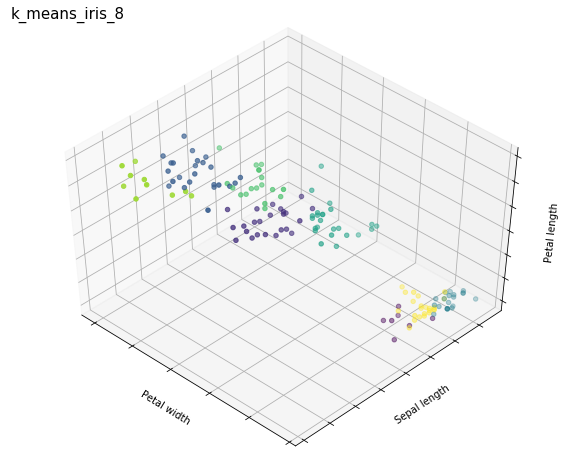

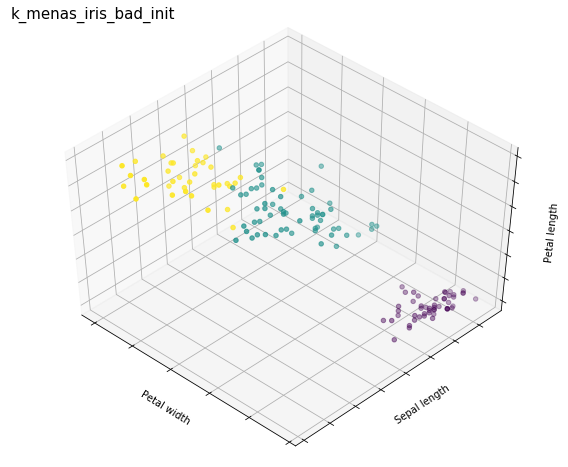

In [15]:
fignum = 1
for name, est in estimators.items():
    fig = plt.figure(fignum, figsize=(8, 6))
    plt.clf()
    ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)
    
    plt.cla()
    est.fit(X)
    labels = est.labels_
    
    ax.scatter(X[:, 3], X[:, 0], X[:, 2], c=labels.astype(np.float))
    
    ax.w_xaxis.set_ticklabels([])
    ax.w_yaxis.set_ticklabels([])
    ax.w_zaxis.set_ticklabels([])
    ax.set_xlabel('Petal width')
    ax.set_ylabel('Sepal length')
    ax.set_zlabel('Petal length')
    ax.set_title(name, loc='left', fontsize = 15)
    fignum = fignum + 1
plt.show()

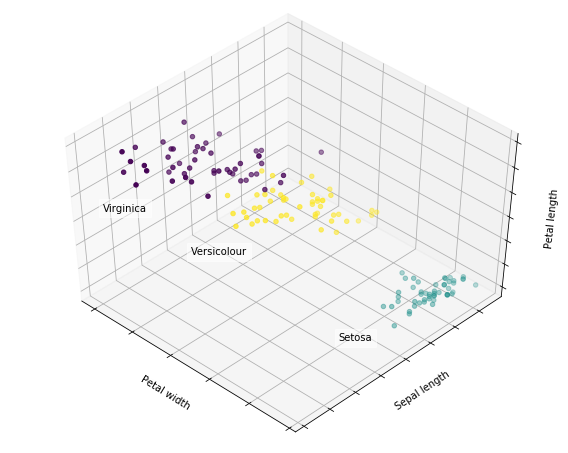

In [18]:
# Plot the ground truth
fig = plt.figure(fignum, figsize=(8, 6))
plt.clf()
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)

plt.cla()
for name, label in [('Setosa', 0),
                    ('Versicolour', 1),
                    ('Virginica', 2)]:
    ax.text3D(X[y == label, 3].mean(),
              X[y == label, 0].mean() + 1.5,
              X[y == label, 2].mean(), name,
              horizontalalignment='center',
              bbox=dict(alpha=.5, edgecolor='w', facecolor='w'))
# Reorder the labels to have colors matching the cluster results
y = np.choose(y, [1, 2, 0]).astype(np.float)
ax.scatter(X[:, 3], X[:, 0], X[:, 2], c=y)

ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])
ax.set_xlabel('Petal width')
ax.set_ylabel('Sepal length')
ax.set_zlabel('Petal length')
plt.show()